# Assignment 3: Optimization II (Solution)

University of California Berkeley

ME C231A, EE C220B, Experiential Advanced Control I

***

These notes were developed by Fionna Kopp, Charlott Vallon, Roya Firoozi and Francesco Borrelli at UC Berkeley. They are protected by U.S. copyright law and by University policy (https://copyright.universityofcalifornia.edu/resources/ownership-course-materials.html).

If you are enrolled in ME C231A/EE C220B you may take notes and make copies of course materials for your own use. You may also share those materials with another student who is registered and enrolled in this course, and with DSP.

You may not reproduce, distribute or display lecture notes or recordings or course materials in any other way — whether or not a fee is charged — without my express written consent. You also may not allow others to do so. If you do so, you may be subject to student conduct proceedings under the Berkeley Code of Student Conduct, including Sections 102.23 and 102.25.

***

In [1]:
# Install required dependencies
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !pip install -q pyomo
  !apt-get install -y -qq glpk-utils
  !apt-get install -y -qq coinor-cbc
  !wget -N -q "https://github.com/thomasfork/ipopt_linux/raw/main/ipopt-linux64.zip"
  !unzip -o -q ipopt-linux64

Note: You should now be familiar with $\texttt{cvxopt}$ to solve linear and quadratic programs. For certain problems in this assignment you will need to use a nonlinear solver. You may specify $\texttt{IPOPT}$ as a solver in $\texttt{pyomo}$ which solves constrained, nonlinear programs.

In [2]:
import pyomo.environ as pyo
def check_solver_status(model, results):
    from pyomo.opt import SolverStatus, TerminationCondition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('========================================================================================')
        print('================ Problem is feasible and the optimal solution is found ==================')
        print('z1 optimal=', pyo.value(model.z[1]))
        print('z2 optimal=', pyo.value(model.z[2]))
        print('optimal value=', pyo.value(model.obj))
        print('========================================================================================')
        bound = True
        feas = True
        zOpt = np.array([pyo.value(model.z[1]), pyo.value(model.z[2])])
        JOpt = pyo.value(model.obj)
    elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('========================================================')
        print('================ Problem is infeasible ==================')
        print('========================================================')
        feas = False
        zOpt = []
        JOpt = []
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
        else:
            bound = True

    else:
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
            feas = True
            zOpt = []
            JOpt = np.inf
        else:
            bound = True
            feas = True
            zOpt = []
            JOpt = np.inf

    return feas, bound, zOpt, JOpt

***

# <font color = blue> 1. Linear and Quadratic Programming: </font>

The following problems include some of the examples from homework 2. This time, use $\texttt{Pyomo}$ to solve them. Please submit your solutions as individual functions for each of the 4 parts.

These functions should have no inputs and 4 outputs. The first two outputs are logical values indicating the feasibility and  boundedness, where a [1,1] stands for a feasible problem and bounded solution. The third output is the value of the optimizer, which should be an $N\times 1$ vector, where $N$ is the dimension of decision variable. If the problem is infeasible or unbounded, the function should return an empty array here (i.e. $\texttt{zOpt = []}$). The fourth output is the optimal value of the cost function. If the problem is infeasible, the function should return an empty array here. If the problem is unbounded return $\texttt{+inf}$ or $\texttt{-inf}$ here. For linear programs, use $\texttt{cbc}$ as the solver and for quadratic program, use $\texttt{IPOPT}$ solver.

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

Write a function $\texttt{LPQPa}$, with function declaration line

`def LPQPa():
    return feas, bound, zOpt, JOpt`

In [3]:
from __future__ import division
import pyomo.environ as pyo
import numpy as np
from pyomo.opt import SolverStatus, TerminationCondition

def LPQPa():

    model = pyo.ConcreteModel()
    model.z = pyo.Var([1,2], domain=pyo.NonNegativeReals)
    model.obj = pyo.Objective(expr = -5*model.z[1] - 7*model.z[2], sense=pyo.minimize)
    model.Constraint1 = pyo.Constraint(expr = -3*model.z[1] + 2*model.z[2] <= 30.0)
    model.Constraint2 = pyo.Constraint(expr = -2*model.z[1] + model.z[2] <= 12.0)

    solver = pyo.SolverFactory('cbc')
    results = solver.solve(model)
    # print(results)
    # print(results.solver.termination_condition)

    return check_solver_status(model, results)

# call the function:
feas, bound, zOpt, JOpt = LPQPa()
# print(bound)

  - termination condition: unbounded
  - message from solver: <undefined>


================ Problem is unbounded ==================


$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0
\end{align}

Write a function $\texttt{LPQPb}$, with function declaration line

`def LPQPb():
    return feas, bound, zOpt, JOpt`

In [4]:
from __future__ import division
import pyomo.environ as pyo

def LPQPb():

    model = pyo.ConcreteModel()

    model.z = pyo.Var([1,2], domain=pyo.NonNegativeReals)

    model.obj = pyo.Objective(expr = 3*model.z[1] + model.z[2])

    model.Constraint1 = pyo.Constraint(expr = model.z[1] - model.z[2] <= 1)
    model.Constraint2 = pyo.Constraint(expr = 3*model.z[1] + 2*model.z[2] <= 12)
    model.Constraint3 = pyo.Constraint(expr = 2*model.z[1] + 3*model.z[2] <= 3)
    model.Constraint4 = pyo.Constraint(expr = -2*model.z[1] + 3*model.z[2] >= 9)

    solver = pyo.SolverFactory('cbc')

    results = solver.solve(model)

    return check_solver_status(model, results)

# call the function:
feas, bound, zOpt, JOpt = LPQPb()

  - termination condition: infeasible
  - message from solver: <undefined>


================ Problem is infeasible ==================


$\textbf{Part (c)}$

\begin{align}
\min \hspace{2mm}&  \| \begin{bmatrix}
z_1             \\[0.3em]
z_2 +5            \\[0.3em]
\end{bmatrix}\|_1 + \|\begin{bmatrix}
z_1-2             \\[0.3em]
z_2             \\[0.3em]
\end{bmatrix}\|_\infty
\nonumber\\
\text{subject to} \hspace{12mm}& 3z_1+2z_2 \leq -3 \nonumber\\
&\hspace{6mm} 0 \leq z_1 \leq 2 \nonumber\\
&\hspace{2mm}-2 \leq z_2 \leq 3 \nonumber
\end{align}

Note: Use the LP formulation of this problem. Hint: You have already done this in HW2!


Write a function $\texttt{LPQPc}$, with function declaration line

`def LPQPc():
    return feas, bound, zOpt, JOpt`

In [5]:
from __future__ import division
import pyomo.environ as pyo
import numpy as np
from pyomo.opt import SolverStatus, TerminationCondition

def LPQPc():

    model = pyo.ConcreteModel()

    model.z = pyo.Var([1,2])
    model.t_one = pyo.Var([1,2])
    model.t_inf = pyo.Var()

    model.obj = pyo.Objective(expr = model.t_one[1] + model.t_one[2] + model.t_inf)

    model.constraint = pyo.ConstraintList()
    model.constraint.add(expr = 3*model.z[1] + 2*model.z[2] <= -3)
    model.constraint.add(expr = (0, model.z[1], 2))
    model.constraint.add(expr = (-2, model.z[2], 3))

    model.constraint.add(expr = -model.t_one[1] <= model.z[1])
    model.constraint.add(expr = model.z[1] <= model.t_one[1])
    model.constraint.add(expr = -model.t_one[2]-5 <= model.z[2])
    model.constraint.add(expr = model.z[2] <= model.t_one[2]-5)

    model.constraint.add(expr = -model.t_inf+2 <= model.z[1])
    model.constraint.add(expr = model.z[1] <= model.t_inf+2)
    model.constraint.add(expr = -model.t_inf <= model.z[2])
    model.constraint.add(expr = model.z[2] <= model.t_inf)

    solver = pyo.SolverFactory('cbc')

    results = solver.solve(model)

    return check_solver_status(model, results)

# call the function:
feas, bound, zOpt, JOpt = LPQPc()

================ Problem is feasible and the optimal solution is found ==================
z1 optimal= 0.0
z2 optimal= -2.0
optimal value= 5.0


$\textbf{Part (d)}$

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \\
\text{s.t. } & z_1 \leq -3 \\
& z_2 \leq 4\\
& 0 \geq 4z_1+3z_2  
\end{align}

Write a function $\texttt{LPQPd}$, with function declaration line

`def LPQPd():
    return feas, bound, zOpt, JOpt`

In [6]:
from __future__ import division
import pyomo.environ as pyo

def LPQPd():

    model = pyo.ConcreteModel()
    model.z = pyo.Var([1,2])
    model.obj = pyo.Objective(expr = model.z[1]**2 + model.z[2]**2)

    model.constraint1 = pyo.Constraint(expr = model.z[1] <= -3)
    model.constraint2 = pyo.Constraint(expr = model.z[2] <= 4)
    model.constraint3 = pyo.Constraint(expr = 4*model.z[1] + 3*model.z[2] <= 0)

    solver = pyo.SolverFactory('ipopt')
    results = solver.solve(model)

    return check_solver_status(model, results)

# call the function:
feas, bound, zOpt, JOpt = LPQPd()


================ Problem is feasible and the optimal solution is found ==================
z1 optimal= -2.9999999704176505
z2 optimal= -6.265025272784229e-10
optimal value= 8.999999822505904


# <font color=blue> 2. System Identification of a Building Zone Temperature Model: </font>

In Homework 1, you computed a discrete time model of a building zone temperature that looks like the following equation:

\begin{align}
T(k+1) = ( 1 - p_1 u_1(k) )T(k)  + p_2 u_1(k)u_2(k) + q(k) \nonumber
\end{align}

where $p_1$ and $p_2$ are now parameters of the model that we want to identify using a least-squares approach.
In the accompanying $\texttt{etch2169.mat}$ file, you have data for the following measurements of the state and inputs on a certain day:

1. zone temperature $T$ in array $\texttt{RoomTempData}$
2. air mass flow rate $u_1$ in array $\texttt{FanData}$
3. supply air temperature $u_2$ in array $\texttt{SupplyTempData}$


For each of the arrays, the first column represents the actual date and time that the measurement (in the second column) is taken. Note that we have access to fan speed data as opposed to air mass flow rate data. Assuming that they are equal (up to a constant) is an approximation which does not hold in general, but is okay for our purposes. To determine the parameters $p_1$ and $p_2$, we use a weekend day and assume that the heat load $q(k)$ is zero (when there are typically few graduate students in the lab to add heat to the system). Specifically, follow these steps:

The dates and times that are stored in the first column of each array mentioned above are in the format of $\textit{serial date numbers}$. Serial date numbers represent a calendar date as the number of days that have passed since a fixed base date of January 1, 0000 A.D.. Note that the measurements were not taken at the exact same times; they are each off by a few seconds from another. Now we use the function $\texttt{datenum}$ to convert the date character back into the serial date number format. Note that 1 minute corresponds to the real number 0.00069444440305233. Furthermore, we use $\texttt{datenum}$ to determine a sampling time $\texttt{TS}$ of 1 minute in serial date number format. Finally, we create a vector of serial date numbers from 10:01:00 AM to 3:59:00 PM on Sep. 9, 2018. The downloaded data contains the day's measurements from between 10 AM and 4 PM.

In [7]:
#@title # Run this cell to generate `etch2169.mat`
#@markdown *DO NOT MODIFY THIS CELL*

data = b"""
TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IE1BQ0k2NCwgQ3JlYXRlZCBvbjogVHVlIFNl
cCAxMSAyMjo0NjowMCAyMDE4ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAAAAAAAAAAAAABSU0PAAAA6wcAAHicvZZ5cBRVHscbkCMygFxZQI4QZAAxBBjCESB0JzHMTIIR
IiqewaKi67peAVnLtRbPpdzout4ptMAr3pYa74vgUV5ZlmIVCYIILOFQDkkIIUDY3+/b38fMa7H8
Q8upoj68me73Xn/6299OV8dx3kx1nA7CTo5P/bTn+LI2jtNWKHA6yr+CuVfmz50/10mR/y+S85an
3v2Vuyjs9XxoB5iWXrBGuWrYo+Apz7SAYyLnfK3cNPEV8J6cLmuVSz/9I/jAxyvAgi/61ylLZl8P
lm78Cny1NHOdcl7ZHeCb27aAH1/jfqNcfehh8OY2zeCam2euV96++Hnw3h4pG5T5feaBD1a+B0aX
9vlW2fxEOfj0syvB18aN3Kh8Ycwt4IUTvgUvX5H9nbLfJ/eDX9TuBQeeEd+k/E/Jk+D6DW02K7df
ehH43bzXwbsv775F+Ujjn8EZLZ+C59069H/KF9v/DWz797Vgt+5ZW5XiGbyq//fgh4/k1yvnP74U
3PDykXp63qa87dWXttHzdmVu/mXgvtiH4OPFA3coD6xaCLY7/8sd9LxTuWLnP8BeV2zdSc/fK/s2
VILhG5vAsR1LflCeesJz4LqUDruU2+69BGwcsHwXPe9WLkm7FiwK/xuc89KIPcqU128FU91Ne+h5
Lz3vpWfwhtWFPypHrq0CJ17Sbp+yYssF4JQdb4C7dvdooOcGem6g50Z6Bi/qvK6RnvfT8356Bv9a
Nb2JnpuY5yZ6PsA8H6DnZnpupudmej7IPB9kng/Scwvz3ELP4OAm75BywcIl4GfNjYeY58PM82Hm
+Qg9H2Gej9Bzq3L2iAWtzHMrPR9lnsHyjzYfpWfHEy4sfBAUz6B4buP5nkHJc1tl5sXng5JnMFbe
q53newbFM9h6dMgJylk33Qi+889vwD/dP76953sGxTMovdFBKb0B3pRxGBTPHT0/z+DuD7p2Ukpv
gOIZlN5I8XzPoOQZFM8nen6eQekNUPLc2fM9g9IboHgOeX6ewQl3deyilN4AxTMonrsqpTdA8QyK
526en2fwrXc2guL5JM/PMzhs5j5QeqO7UnqjOz338Pw8g5JnUPLcU9nyl6t60nNPeu7l+XnuRc/g
KxWR3sr+S/7Vm55B6Y1Uz89zKj2Dd75x7h88P89g1tud+3h+nvvQMyh57kvP4FNrVoPnrM/oR8/g
yvnb+9HzyfQMSm+cTM/9PT/PoPTGAM/P8wB6HkDPA+kZbJ+5aiA9D1KWZd8OSm8Mouc05fu596Ux
z2nM82DmeTA9p9NzOj2n0/MQegZ/XPAJ+OgN6afQMyi9AUpvDGWeQXkPDmWew8qM5x8DpTfCzPMw
Zc571aD0xnDmeTg9D2eeR9AzKL0xgnk+VSm9AV6ztx6U3hiplPcgKL0BXt9afJpyS+jF05jnDHrO
oOcMeh6lfPmF60Yxz6PoOZOeM5nnTHoerZTeGE3Po5nnMcrFFzwNSj+PpWdQemMsPUeU0hsR5jnC
PI+j53H0PI6es5jnLHrOoufxSukNUN6D4+l5Aj1PoOeJzPNEegaP/nfQJKW8B0HpjUn0nM08g9LP
2czzZOZ5MvM8mXmeopTemELPU+kZlPcg+MSQfjnMcw4959DzNKX0xjR6Bod8PtVVSm+49Ax+ffYM
Tym94THPufScyzzn0nOe0r36ijzmOY+e8+k5n57z6fl05hmU3gDlPVjAPIPSGwX0PJ2ep9NzVLl1
eRlYvPKjKD3HmOcY8xyj57iy0+bFcXqOM8+F9FxIz4X0XKSU3iii5xnKO7rNBSf3fncG83wGPYPS
G+DhkcOL6bmYnouZ5zOV0hvgldE9oPTGTKX0xkzmeRY9z2KeZ9FziVJ6o4R5BqU3zqJnUPoZlPfg
bKX8Ge1GIoWucFnlHFD+sLbGNbUhsggsLSsjw6AbqbaOW1ZZeVya881xpWX1cf/88sJkyhHx5N/N
OvLh+bVxe1/+WNaxzgseZ36XffD4ujiv1zrerJOYL8x1KqzjDcVHgGH+7prriifTrLussq91nnzM
efx9jrWv0rIq63dzHWZe8705LrFutbUvGceS10/M0xCz5w/F7eNC1nGyP3O8NZZ1yLIY90FGrN+D
x5uxeOe8NWafHC/iuC5GL7Hk/cj88eTzEtdZZ80r+bDWM/sz68h8Uc4fpc8o14/yPP5edNxxghVR
zm/NF/xe9sVxdfR468v+o8me5GP5lfvyM57ssaFcf9SeJzhvPfcRsXwYD7KutU+zb3Pd5neZl9+H
zPVMT6bsh+MKjp1Jv4ay70nct8t95Pnj8oLkdWRs7UPO4/pu1KZjUeYN3L/qQD5c63oTnsoDx9db
9zXx/PS17oPxb44z+TXHGQbvnzk+mCPnp/fXouz3N7kPv0TJSTa9uP73NXncdwHHvC/hwP5rAr5r
LJ+J5yX4HIf4nBRZvWF6wowTveMedyz33ZrHPE9J81o+ZR/mPv8uXg0lZ1O5bh73z/wXmX1YOTX5
TOS3wspv4rpMD4St3CWef9OX4eD5vJ9V1n01fn7pemQeM3Z5Xfk+5zAvdo8Y38GeNXkxfesce17s
584JPH8mP8FeTOQuZPJk5THx/JveKAr2yu+SB+fYc1c71R+7udwXc1Fb4Huos/IR9JZ47kyPVFm9
Zo4LvueC3s335r3pHMtj7W/ynMg67Jdq9ot7evJ1So6ZE5O/RYH3e12gN0JWHqxe+T+wKJkoDwAA
AJUGAAB4nK2WC0xVdRzHDxr4IlJBfCAv5a0ScBF5iNwjIiIiz5yZGWpiZgw1K2fOMcuszDnnrCh1
zJw5tZxjzpw9yJw5R5kxNfL9QkVFFEWuiPT7/c73zu6Bw72obHefncu599z/53zu73/dFEUp91QU
F2JXRSP/OeP4DSdF6UQkKK70yCkqKsybVThvzPSF0/m8bvQoptdv+2TlMXNxkNrc/bKw+zr1OHPf
V+uFbgMbhF5bck4wK7Z/J1yyq+s/zKF7ZgqLY38SRo7qV8VMPLRQOD7nqHBjZdi/zDt5Hwo3TTkr
3Hkp4SQzv+Zz4VsL64Xl9yacYs5v+lbo79T5NPOoyzRh4Md7hFG9Pc4wL/QtEq71PixMHhx4lvnF
5qXC1G1VwrzomHNM5/g1wt1JN4Tdfk05z9x7sFR4MKtZ+O6kyReYh0/sEvq83OMic8XsOcLYwgPC
qwt8LzFH3l0kvGGpFFo+iLjMJM+X4Vn4fU9zNXOa59fCuaX3q+H5CrMoeIfwt63OV+FZePrHn4Wr
9ve/xjyf/Law9o8j1+C5hrn91RXCljPnauD5OrNzwTphz7rbQu/FE28wPd7bIjywxOkmPAuXue69
Cc+1zI/WFgpjSg7VwvMtZn1IsXBz+Mlb8FwHz3XwLJyVknqb6Zm+6TY8Cwf8PekOM3hqmfDEdLd6
5pCLs+vhuR6e7zK/XLRYmLb0mHBDS/g9eBZOWV19Dz03wHMDPDfA8330fB89NzL/iprRCM+N8GxB
zxZ4tsDzA/T8AJ4fwHMTem6C5yb0/BA9P0TPzfDcjJ6b4fkRen6Enh/Bcwt6Fiplp1rgWVE1z8LJ
+2qE5NlJ1TwLybOQPHdStZ6F5LmzqvUsJM9C8vycqvUsJM9C6tlZ1TwLqWch9ezCpLkhJM/CX/yz
u6haz0Ly3FXVehaSZyHNjW6q1rOQPAvJc3dmZtVyIc0NIXnuoWqeheRZSJ5dVa1nIfX8PDN85WtC
6ll4fFVvN1XzLCTPQvL8gqr1LKSehY07o3vCs5B6FtLc6MWkudELnoU0N3qrWs/C90+7usOzOzy7
w7OHqvXsAc9C6rkPPAup5z7w7KlqPQtpPgup576q1rPQd1iXfqrWcz94FlLP/VWtZ+GatD+FozND
BzBpbgipZ2FufrwXPHvBsxc8D1S1ngfCszfznWVTveFZSD37wLMPPPvAsy88+8KzLzz7MbfuXu0H
z37o2R89C+dUNPnD8yB4HoSeBzMvXX9TePLqfuFntd4B8BwAzwHoORCeA9GzkOZGEHoOgmfhjA2Z
wfAcjJ5D0LOQ9sEQ9BwKz6HoORQ9h6HnMHgOQ89D4FlYNrdO+Pr89KHwLKS5MYxJc0NIc2MYPIcz
k9bPC4fncHh+EZ6FtA8KaW5EoGchzY0I9BzJXHDkm0j0HAnPUUyaG1HwbELPJvRsQs/R8BwNz9Hw
PByeh8PzcHiOgWfh7wGWGPQ8Ap5HwHMsPMei51j0HMekuREHz3HwHA/P8fAcD88J8JyAnhPQ80gm
zY2R8JwIz4noORGeRzFpHxTSPjgKnpPgOQk9J8GzGZ7N6NmMnlUmzQ0VnlV4Ho2eR8NzMpP2wWT0
nAzPY+BZSL83hDQ3UpgZzp8KaW6kwPNYJs2Nseh5LDynMkMidqbC8zgmzY1x8DwOntPQcxo8p8Hz
eCbtg8JXZl4Qus5JTIfndHhOh+cJ6HkCPGcwaW5koOcMeJ7IpLkxET0Lr2wcnMmkfTATnoW7fhiR
Bc9Z6DkLnrOZNDey4TkbnnPQcw485zJpbuSiZyHNjTx4zkPPeej5JSb9jC4t2Ztj/h/ph7kwv+Bg
h2g2leF4i82x9X2tx/rn7V3PbKrE+VU2x/rn9a8zen/rcXlFhQ3176enopxrl/rz7a3HaF1G180v
qHaIZlN9u2x9XqWBlx1t3k8rje7bs1qH/nOWllgcIv3ltkXr/1t7qGyzD/369OvS3/+nXYfR584v
cHGI5RWuNsdmk/tTsbSkf7vUX1/vtaN96j04um79evUe9P/Xr0NR/NpkfkFQm8f2aDaZbKh/vrxi
aJvnWVlaEucQW7/O9r5YfVq9W7/X9uaN/j4pDvZorx97njvKp/VHr3DovMfXddF5sJ0f+jnSej+q
avf70FG/es9Gfh31beSzdcfubfrQ92alve/1k3bjaD/21vWk37vH88F2/db9QP+7Qk/9vmG0HxjN
+Y52oPfyrOaaldbrG81ho/XZW7fReo3W/azniVEncvwf+ea6qQ8AAAC/BwAAeJytlglQVVUYx68b
oREuKEpkoiIiIqKAiIi8K4IIyHssWlQWjiNmqZGa49IY5ag56lhZjpjj0KZjjplhpeU4jGO04ThG
argQuaDiSk9EVvvOd//H67k8xpzxzTA/7naW3/mf715PTdOKvDXNjeiuGRS/Djh+uY2mtSUSNE/6
y3gjN3fWoszps3PHTZ0/VdM60rk88bzn2mO2vAD9uXWVzBk+cccFe/bZwny1oJa5MCjzhGBg6C5m
WUSnvwRXRU9nntl/gLn2oE+Z4KaUBcxtx/9gNjwTfFJwx5SVzLvlFUyPmTGnBPfP2cicNd/J7L04
9bTg4be2M5cub39GMGT1S8x3PPYx123oUS4YuzmXeeOT35mNgwP/FnQG5jE/DznFzAwfUSE49cAH
zK6HrjGnx4//R9A7+VNm/2PNzNKTWWcFB75QyFxyxuOc4PkrrzA/rP6JGV/rd16wpnEJc8LSY8zJ
7sMvCJLnC/DM7PSRXin446bNzJ/96yrh+aJgyY6dzDd3u1+CZ2aUXsSsSvC9LBjzy3xmUvrRy/Bc
Jeh+9l3m89POVsHzFcHsqg1X4Jm5qNl+VfD1hm3Mvm3aXYNnZvl7P1yD5+uCZ3u+xlzf+zdmXP8B
NwQdO99maoWnmbv3Rt6E55vwzDz4a2K14Nwjn1XDczU8/yu4rGIPM7yysxOemSNnH3LC8y14vgXP
t+C5Bp6Z33ldqkGeb8PzbeT5NjzXIs+1yPMdweDvp92B5zvwXIc818FzHTzXC9rLltfDcz08NyDP
zC43qxuQ50bkuRF5boLnJuS5CZ6bkedm5JlZsC3gLvLMnBJZfheeNd3wzPw29iqT8txGNzwzyTNz
weRn2+pGnpnkuZ1ueGZSnpmX5vZpL7hx4WLmF21PMMlzB93wzKQ8M8mzmyDVDSblmem7Nf0x3cgz
kzy760aemeSZSXWjo27kmUmemeS5kyDVDSbVDSZ5flw3PDMpz0zy7KEbeWaS5yd0wzOT8swc3q27
p254ZlKemeS5s27kmUl5ZlLd6ALPzDmJN7rAc1fBfcUFzGJHE5Py3E038twNnr3g2QuemZTn7vDc
HZ6ZdctCe8Azk/LMpLrhrRt59oZn5p9fTeqpG3lmUt3opRt57gXPTMqzj27kmXn98BHmltKgJwWp
bjD3XjzH3HU+2heemZRnX3h+SjfyzKS60VvwqNuLTMozk/L8NDwzKc9Pw3MfeO4Dz0zKs59gh1Hv
M6luMKlu9EWe+yLPfeG5H/LcD577wzOT6kZ/5NlfkOqGPzz7I88D4HkA8jwAeQ5AnplUNwKQ54Hw
PBB5DkSeA+E5EHkeBM+DkOdByHMQ8sykuhGEPA8W9HHmD4ZnZlFNSjA8ByPPQ5DnIcjzEHgOEfzY
b24IPIfA81B4HgrPQ+E5FHlmUt0IRZ6HwfMweB4Gz8PheTg8h8FzGPIchjyHw3M4PIfDcwQ8R8Bz
BDyPgGem//Z6JtXnSHiOhOeR8DwSnkciz1GCVDei4DkKnkfB8yh4HgXP0cgzk+pGNPI8WpDqxmh4
joHnGHiOgecxgvQeZFLdGAPPsfAcC8+x8GyDZxvybEOedUH63tDhWYfnsYJUN8bCc5zgyhkz45Dn
OHgeB8/j4JlJdSNe8MtVq5lUN+LhOUGQ6kYC8pwAz+MFl+/5ejw8JwpS3UiE50R4noA8T4DnCfCc
JEjvwSR4ToLnZHhORp6TkecU5DkFnicKUt1gUt2YCM+pglQ3UpFnJn1v2AXpPWiHZzs8OwSpbjiQ
Zwc8pyHPafCcBs/pyHM6PGcI2nJnZSDPTKobmfCcCc/Mb9aETeL+NS07JyHNRizIz2LSGTBPOV+Q
H+Ww8f2VqYJFJWsUZudsZdrCnPLYbhyHOQyudxjtVjiM9nzSbPf1n52TA65Af/lpeA7ni9FOod1o
R7Mb/ZekGveXYTwp8jr6yZLPgU7MIwDtZ6C/RZb+tuL8PpwvBL0UH+TJrvabp/RP88N9BdIfjv2U
+dvC5rnsn1pWfEhPcp3kuFveX6asozkOwxu1l3o/5frJ66Znm8vxS39mbvIs61Yo1w3HpbivAucr
cd6J5+qU6+bzK5R50n9Ku7Kd7By39Ptp5ssN47cpudHu5ScF83XCi5oXGhcY5TKnrXm3zo9+yvgo
R3Kc6cZ1P1wPsNxXqszXXFdNed76nBxPyzy7fp72KZ6zoZ0EHN9bL+lR5kDuP/jzgrcMXN/qMi8y
t9KfNSct51lhWefWcuPar9UrraMyPxovzmfh/myFsh0zx4UuPZr+1XbleXMc6rrK+mLOW87HT1kP
OT7Zr6yntN9knbWjP+WY6jPy7od1WKHUYbku1lzLfSbnK/NkXZ+HzbnpyfV6SO80HoUyn+Z9NqUf
k5Uu89JaflruNyf8FCl1Qr73tHv100fxS+0ofmXuadxKnZR1/kGeW6uXD5v3lvs52+J1HtZhkbIe
dEXuV2W/y7zJfS/nTfUfeSxzmavW6racj3UdH1QfrbmR+0POyzyW7RZbciz791E8WeuAuV4Bynuk
qMRDyYG57+Yp9ZC8uvQivztMP+r70/r98aj2XVFJsDJfWacenIs6mUv5HYH55MjvBOV9KvNh/X6Q
71Pzu2/FI53n/82JOd+AdLX9Ckt/ah02vVE9+g9Dyq4G
"""

import base64
data = base64.b64decode(data)
with open('etch2169.mat', 'wb') as f:
  f.write(data)
del data
!md5sum etch2169.mat

4ac0be8f8c1e9c7e543a0329f84b5953  etch2169.mat


In [8]:
from scipy.io import loadmat
import numpy as np

Data = loadmat('etch2169.mat')
RoomTempData = Data['RoomTempData']
FanData = Data['FanData']
SupplyTempData = Data['SupplyTempData']

#print the first data point  just to understand the data type
time_room_temp = RoomTempData[0,0]
time_fan  = FanData[0,0]
time_sup_temp = SupplyTempData[0,0]

# print(time_room_temp)
# print(time_fan)
# print(time_sup_temp)
# print(RoomTempData[0,1])
# print(FanData[0,1])
# print(SupplyTempData[0,1])

In [9]:
from datetime import date
from datetime import datetime as dt

def datenum(d):
    return 366 + d.toordinal() + (d - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)

d_start = dt.strptime('2018-9-9 10:1','%Y-%m-%d %H:%M')
d_end = dt.strptime('2018-9-9 15:59','%Y-%m-%d %H:%M')
d_start_plus_onemin = dt.strptime('2018-9-9 10:2','%Y-%m-%d %H:%M')

TS = datenum(d_start_plus_onemin) - datenum(d_start)
print(TS)
TimeQuery = np.arange(start=datenum(d_start), stop=datenum(d_end), step=TS)

0.00069444440305233


Verify using *np.diff* and *np.histogram* that the data is nearly collected with uniform sample time, but that there is a few percent variability.

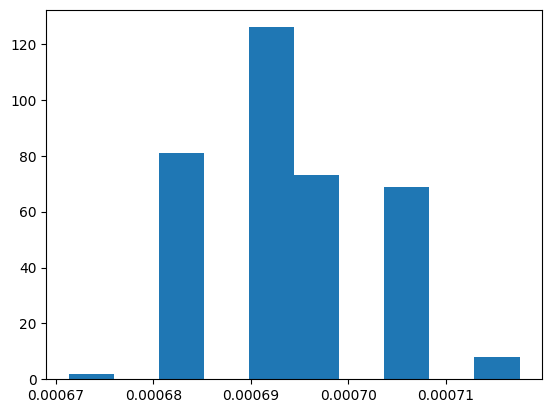

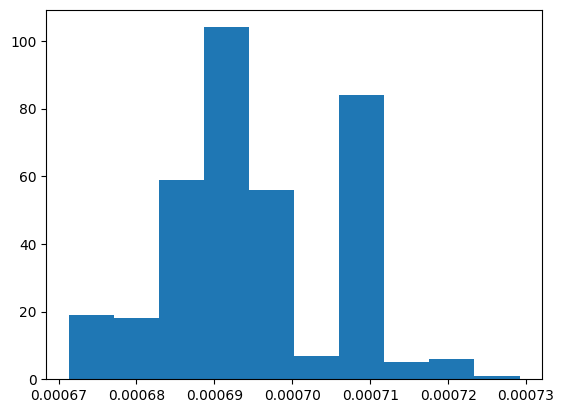

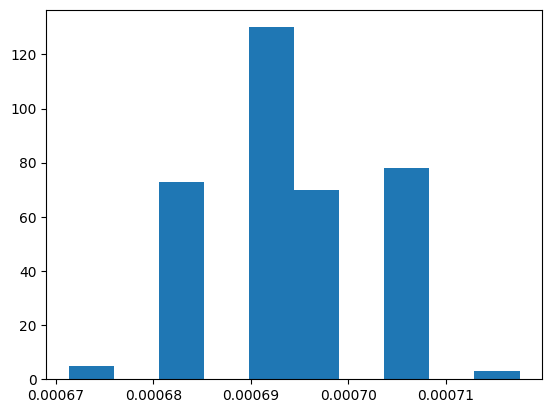

In [10]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(np.diff(RoomTempData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

counts, bins = np.histogram(np.diff(FanData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

counts, bins = np.histogram(np.diff(SupplyTempData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

Next we are going to interpolate the data points to obtain two effects
1- remove outlies/filter the data, 2- call the interpolated fucntion so that  the new data is sampled exactly every minute (start at 10:01 AM, then 10:02 AM, etc. till 3:59 PM). (note that python has many ways of resampling data-- this is just one approach)  **Hint:**
Use the $\texttt{scipy}$ package $\texttt{interpolate}$ and the commands $\texttt{interpolate.interp1d}$ and $\texttt{interpolate.UnivariateSpline}$.  As an illustration, understand the example below:

Text(0, 0.5, 'y')

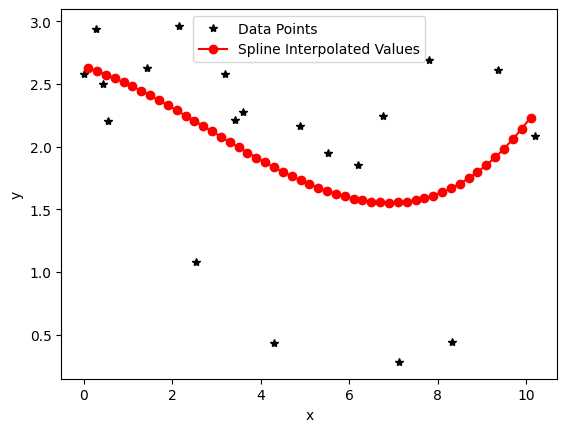

In [11]:
from scipy import interpolate

xData = np.cumsum(np.hstack([np.zeros((1,)), 0.1+np.random.rand(19,)]))
yTmp = np.hstack([np.sort(3*np.random.rand(10,1)), np.fliplr(np.sort(3*np.random.rand(10,1)))])
yData = yTmp.flatten()
xQuery = np.arange(start=0.1, stop=np.max(xData), step=0.2)

f_spline = interpolate.UnivariateSpline(xData, yData)
yInterpSpline = f_spline(xQuery)

plt.plot(xData, yData, 'k*', xQuery, yInterpSpline, '-or')
plt.legend(['Data Points', 'Spline Interpolated Values'])
plt.xlabel('x')
plt.ylabel('y')

Plot and compare the linear- and spline-interpolated values to the actual data. Choose a method and justify your choice. Use a different interpolation method if you see fit.

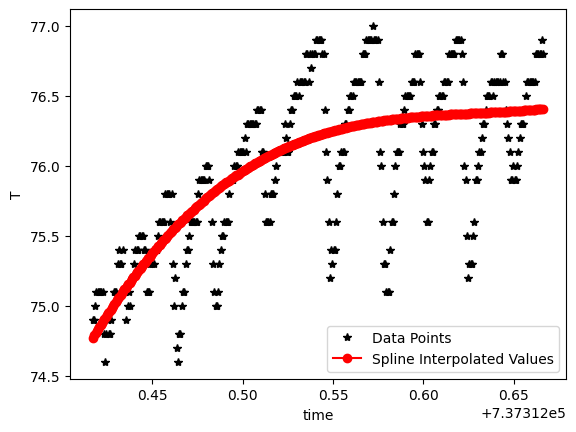

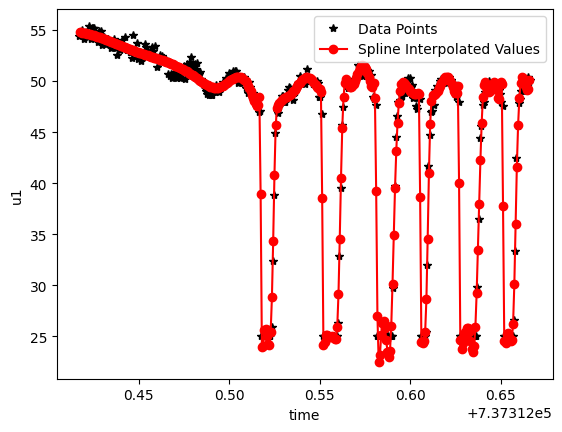

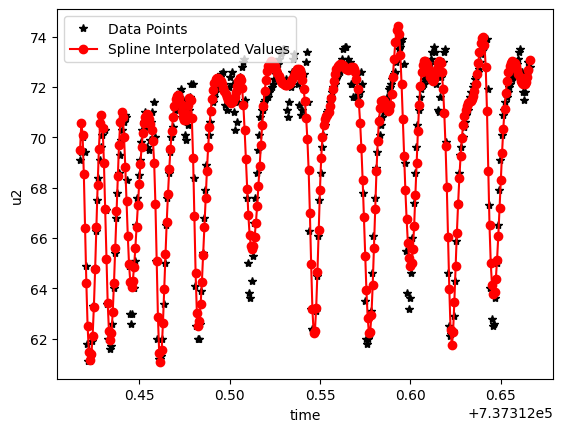

In [12]:
# xData
time_T = RoomTempData[:,0]
time_u1 = FanData[:,0]
time_u2 = SupplyTempData[:,0]

# yData
data_T = RoomTempData[:,1]
data_u1 = FanData[:,1]
data_u2 = SupplyTempData[:,1]

# Spline
InterpSpline_T_mid = interpolate.UnivariateSpline(time_T, data_T)
InterpSpline_T = InterpSpline_T_mid(TimeQuery)

InterpSpline_u1_mid = interpolate.UnivariateSpline(time_u1, data_u1)
InterpSpline_u1 = InterpSpline_u1_mid(TimeQuery)

InterpSpline_u2_mid = interpolate.UnivariateSpline(time_u2, data_u2)
InterpSpline_u2 = InterpSpline_u2_mid(TimeQuery)

# T Plot
plt.plot(time_T, data_T, 'k*')
plt.plot(TimeQuery, InterpSpline_T, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('T')
plt.show()
# u1 Plot
plt.plot(time_u1, data_u1, 'k*')
plt.plot(TimeQuery, InterpSpline_u1, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('u1')
plt.show()
#u2 Plot
plt.plot(time_u2, data_u2, 'k*')
plt.plot(TimeQuery, InterpSpline_u2, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('u2')
plt.show()

**Part (a)**

To do least squares parameter estimation, we want to solve the following problem:
\begin{align}
\min_{p_1,p_2,e}&\: \sum_{k=0}^{N-1} \|e(k)\|_2^2 \\
\text{s.t. } &T_{data}(k+1) = (1 - p_1 u_1(k))T_{data}(k)  + p_2 u_1(k)u_2(k) + q(k) + e(k) \\
& \forall k = \left\{0,\ldots,N-1\right\}
\end{align}
where N is the number of data samples used, $T_{data}$, $u_1$, and $u_2$ represent the resampled/interpolated data, and $e(k)$ is the one step model estimation error of the temperature, whose norm (over time) is minimized by proper
choice of parameters.   Populate the appropriate matrices $A$ and $b$ using the known data such that

\begin{align}
\left[ \begin{array}{c}
e(0) \\ \vdots \\ e(N-1) \end{array} \right] = A p - b
\end{align}

where $A \in \mathbb{R}^{N \times 2},  b\in \mathbb{R}^{N}$ and $p$ is the $2 \times 1$ unknown parameter vector.
Perform the least squares estimation of the parameters using $\texttt{cvxopt.solvers.qp}$.   Implement this code in a function

`def bldgIdentification(Tdata, u1Seq, u2Seq):
    return estParm`

In [13]:
import cvxopt
from cvxopt import matrix, solvers

#Model using interpolated data
def bldgIdentification(Tdata, u1Seq, u2Seq):
    b = -np.diff(Tdata)
    a2 = -np.multiply(u1Seq[:-1], u2Seq[:-1])
    a1 = np.multiply(u1Seq[:-1], Tdata[:-1])
    A = np.concatenate([np.reshape(a1,(len(a1),1)), np.reshape(a2,(len(a2),1))], axis = 1)
    # print(A.shape)
    P_mid = 2*A.T @ A
    q_mid = -2*A.T @ b
    P = cvxopt.matrix(P_mid, tc='d')
    q = cvxopt.matrix(q_mid, tc='d')
    sol = cvxopt.solvers.qp(P, q)
    estParm = sol['x']
    return estParm

Param = bldgIdentification(InterpSpline_T,InterpSpline_u1,InterpSpline_u2)
print(Param)

[-5.27e-06]
[-4.28e-06]



In [14]:
# Model using raw data
def bldgIdentification2(Tdata, u1Seq, u2Seq):
    b = -np.diff(Tdata)
    a2 = -np.multiply(u1Seq, u2Seq)
    a1 = np.multiply(u1Seq, Tdata[:-1])
    A = np.concatenate([np.reshape(a1,(len(a1),1)), np.reshape(a2,(len(a2),1))], axis = 1)
    P_mid = 2*A.T @ A
    q_mid = -2*A.T @ b
    P = cvxopt.matrix(P_mid, tc='d')
    q = cvxopt.matrix(q_mid, tc='d')
    sol = cvxopt.solvers.qp(P, q)
    estParm = sol['x']
    return estParm
Tdata = RoomTempData[:,1]
u1Seq = FanData[0:-1,1]
u2Seq = SupplyTempData[0:-1,1]

Param = bldgIdentification2(Tdata, u1Seq, u2Seq)
print(Param)

[ 4.02e-04]
[ 4.41e-04]



The input arguments $\texttt{u1Seq}$ and $\texttt{u2Seq}$ are of length $N$, while $\texttt{Tdata}$ has length $N+1$.  The code should
formulate and solve the least squares problem, and return the parameter estimate as a $2 \times 1$ vector.

**Part (b)**

See how good are the model predictions over a long horizon. On a single figure, plot the day's actual Temperature data versus time. Then, compute and plot $T_{est}$ by propagating the the model forward as follows:
\begin{align*}
T_{est}(0) &= T_{actual}(0) \\
T_{est}(k+1) &= (1 - p_1 u_1(k))T_{est}(k)  + p_2 u_1(k)u_2(k) + q(k)
\end{align*}
using the values for $p_1$ and $p_2$ as obtained by the least-squares solution.

***

<ipython-input-15-d9499434f555>:20: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Interpolated Temp','Predictive Model Temp')


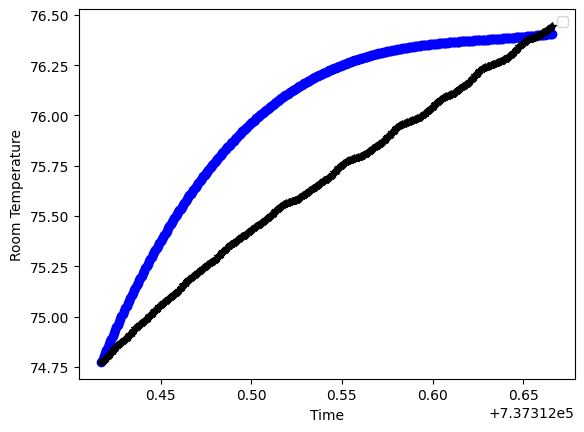

In [15]:
# Tdata = InterpLinear_T
# u1Seq = InterpLinear_u1[0:-1]
# u2Seq = InterpLinear_u2[0:-1]

#Estimation using model based on interpolated data (This is the correct approach)
Param = bldgIdentification(InterpSpline_T,InterpSpline_u1,InterpSpline_u2)

N = len(InterpSpline_T)
T_est = np.zeros((N,1))
T_init = InterpSpline_T[0]
T_est[0] = T_init
for i in range(N-1):
    T_est[i+1] = (1 - Param[0]*InterpSpline_u1[i])*T_est[i] + Param[1]*InterpSpline_u1[i]*InterpSpline_u2[i]


plt.plot(TimeQuery, InterpSpline_T, '-bo')
plt.plot(TimeQuery, T_est, 'k*')
plt.xlabel('Time')
plt.ylabel('Room Temperature')
plt.legend('Interpolated Temp','Predictive Model Temp')

**Part (c)**
The least squares predictive model of the termperature does not match the interpolated temperature data very well. The least squares model only finds two parameters which do not vary with time and the model function in linear in these parameters. This explains the linear-like approximation we see. The temperatures at the beginning and end of the time period match between the interpolated data and the predictive model, and in between the endpoints the predictive model forms a linear approximation.


# <font color=blue> 3. Linear Classification: </font>
In this problem, a population $P$ (often people, but not necessary) refers to a collection of distinct objects, called its *members*.   Associated with each member $m_k$ is a
vector $v_k$ of values of known, delineated traits
of that member, called the member's $\textit{features}$.  The dimension of each feature vector is $n_F \times 1$.
Hence, using this feature vector, each member of the population can
be represented as a point in $n_F$ dimensional space.  Note though, it is possible for two different members to have identical features.

Suppose the the population $P$ is divided into two distinct groups, $G_1$ and $G_2$.
The goal of *linear classification*, is to find a linear function, $L(v) := c^T v + b$, such that
\begin{align}
c^T v_k + b  > 0 \ \  {\rm for \ all} \ v_k \in G_1
\end{align}
and
\begin{align}
c^T v_k + b  < 0 \ \  {\rm for \ all} \ v_k \in G_2
\end{align}

In other words, the linear inequalities $c^T v + b >0$ and $c^T v + b < 0$ split
the $n_F$-dimensional space into two nonintersecting halfspaces, and one group of the population lies entirely in one halfspace, while the other group lies in the other halfspace.  The linear function $L(v) := c^T v + b$ is said to *classify* the population into the two groups.  **Such a function is often used as
a predictor for another person, attempting to predict which group it belongs to, based on
the value of $L(v)$, where $v$ is the known vector of this person's traits.**

A concrete example will make the ideas clear.  Suppose $n_F = 2$, and the traits (features) are the 2-dimensional vector
\begin{align}
v = \left[ \begin{array}{l}
{\rm age} \\
{\rm number \ of \ action \ movies \ seen \ this \ year} \end{array}
\right]
\end{align}

The population consists of $n_P$ people who have just viewed a pre-release showing
of a new movie, called MovieX.   The two groups consists of the people who liked (based on a short exit survey)
MovieX ($G_1$), and those people who did not like MovieX ($G_2$).
Using this data, the producers of MovieX want to build a linear classifier (based on *age*
and *number of action movies seen this year*) which will predict if another person (outside this population set) will like the movie, so they can target their promotions accordingly
(eg., if they discover that older viewers who don't see many action movies prefer MovieX, then they might do a pamphlet-handout to middle-aged people buying non-action movie tickets a week before MovieX is released).

The generalization is as follows:
Given two sets of points

\begin{align}
G_1 = (v_1,v_2,...,v_N), \quad
G_2 = (v_{N+1},v_{N+2}, ... v_{P})
\end{align}

where each $v_k \in {\bf R}^{n_F}$.
The task is to find a linear constraint that "separates" them.  
Specifically, find $c \in {\bf R}^{n_F}$ and $b \in {\bf R}$ such that

\begin{align}
c^T v_k + b > 0  \ {\rm for \ all} \  k \leq N
\end{align}

and

\begin{align}
c^T v_k + b < 0  \ {\rm for \ all} \  k > N.
\end{align}

Note that if this is possible, then simply by scaling $c$ and $b$, it follows that

\begin{align}
c^T v_k + b \geq 1  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -1  \ {\rm for \ all} \  k > N.
\end{align}
A serious problem is that there may be some outliers in the data so that the two sets $G_1$ and $G_2$ simply can't be separated by a hyperplane (ie., there is some discrete overlap in the points).  For those points, you need to add/subtract a nonnegative slack variable, $t_k \geq 0$ to make it work, so perhaps we adjust the requirement to
\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}
But, hopefully $\textbf{most points don't need this adjustment}$, so you force the
use of such $t_k$ to a minimum
by minimizing $\sum_{k=1}^P t_k$.    This results in a linear program of the form
\begin{align}
\min_{c,b,t_1,\ldots,t_P} \ t_1+t_2+\cdots + t_P
\end{align}
subject to
\begin{align}
t_1 \geq 0, t_2 \geq 0 , \ldots , t_P \geq 0
\end{align}
and
\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}

Write a function call $\texttt{buildLinClass}$, with function declaration line

`def buildLinClass(G1, G2):
    return c,b,t`

The input arguments $G_1$ and $G_2$ are real-values arrays of dimension
$n_F \times p_1$ and $n_F \times p_2$, respectively.   Each column is a feature
vector of a particular person in that group.

The output arguments are a $n_F \times 1$ vector $c$ and a scalar value $b$, such
that the linear function $L(v) := c^T v + b$ approximately classifies the two groups,
with $L(v) >0$ for members of $G_1$ and $L(v) < 0$ for members in $G_2$.  
Of course, because of outliers, the classification is not necessarily exact, but the linear program minimization has minimized the total amount of slack variables used to create the separation.  The 3rd output argument is the vector of required corrections $t$,
and is of dimension $(p_1 + p_2) \times 1$.

You can try your function out on synthetic data (which has no outliers) below.   Here there are only 2 features, so we can visually see the classification (could also do in 3-dimenions).  Note that in practice, the number of features is usually much larger than 2, and hence cannot be visualized.

     pcost       dcost       gap    pres   dres   k/t
 0:  1.7004e+01  1.6770e+02  6e+02  2e+00  1e+01  1e+00
 1:  1.9636e+01  6.9247e+01  1e+02  7e-01  4e+00  2e+00
 2:  1.6056e+01  3.2530e+01  4e+01  2e-01  1e+00  8e-01
 3:  1.1153e+01  1.8532e+01  2e+01  1e-01  6e-01  4e-01
 4:  9.1595e+00  1.3631e+01  2e+01  6e-02  4e-01  2e-01
 5:  8.1707e+00  1.1482e+01  2e+01  5e-02  3e-01  2e-01
 6:  6.8048e+00  8.8295e+00  1e+01  3e-02  2e-01  8e-02
 7:  5.6372e+00  7.2359e+00  1e+01  2e-02  1e-01  7e-02
 8:  4.1697e+00  5.3093e+00  1e+01  2e-02  9e-02  5e-02
 9:  3.7754e+00  4.7374e+00  1e+01  1e-02  8e-02  4e-02
10:  2.2733e+00  2.6930e+00  5e+00  6e-03  3e-02  2e-02
11:  2.2370e+00  2.6483e+00  6e+00  6e-03  3e-02  3e-02
12:  1.2975e+00  1.5280e+00  3e+00  3e-03  2e-02  1e-02
13:  7.0055e-01  8.2455e-01  2e+00  2e-03  1e-02  6e-03
14:  5.3414e-02  6.2880e-02  1e-01  1e-04  7e-04  6e-04
15:  5.3673e-04  6.3190e-04  2e-03  1e-06  7e-06  6e-06
16:  5.3673e-06  6.3191e-06  2e-05  1e-08  7e-08  

(-3.941775344561403, 3.629268319917159, -3.8495024046025987, 2.836059832785605)

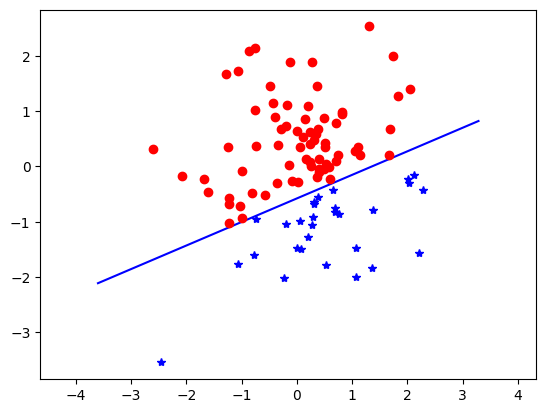

In [16]:
import numpy as np
import scipy as cp
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
def buildLinClass(G1, G2):
    nf, p1 = np.shape(G1)
    n, p2 = np.shape(G2)
    f = np.concatenate([np.zeros((nf+1,)), np.ones((p1+p2,))], axis = 0)

    A = np.concatenate([np.concatenate([np.zeros((p1+p2,nf+1)), -np.eye(p1+p2)], axis = 1),
                        np.concatenate([-G1.T, -np.ones((p1,1)), -np.eye(p1), np.zeros((p1,p2))], axis = 1),
                        np.concatenate([G2.T, np.ones((p2,1)), np.zeros((p2,p1)), -np.eye(p2)], axis = 1)], axis = 0)

    b = np.concatenate([np.zeros((p1+p2,)), -np.ones((p1,)), -np.ones((p2,))], axis = 0)

    f = cvxopt.matrix(f, tc='d')
    A = cvxopt.matrix(A, tc='d')
    b = cvxopt.matrix(b, tc='d')

    sol = cvxopt.solvers.lp(f,A,b)
    xOpt = sol['x']
    J = sol['primal objective']

    c = np.array(xOpt[0:nf]).flatten()
    b = np.array(xOpt[nf]).flatten()
    t = np.array(xOpt[nf+1:]).flatten()
    return c, b, t


nF = 2
nP = 100
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP)

LPop =  cTrue.T@Pop + bTrue
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

[cEst, bEst, tAdjust] =  buildLinClass(G1,G2)
# max(abs(tAdjust))      # should be 0 (or very close)
f1Min = np.min(Pop[0,:])  # minimum age
f1Max = np.max(Pop[0,:])  # maximum age
f2Min = np.min(Pop[1,:])  # minimum number of movies
f2Max = np.max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')

We can add some random noise to 10\% of the data, so that outliers appear.   Now the classification will likely not be perfect,
but will still make good sense.  Run this several times to gain intuition.

     pcost       dcost       gap    pres   dres   k/t
 0:  1.7853e+01  1.6731e+02  6e+02  2e+00  1e+01  1e+00
 1:  2.5587e+01  6.6698e+01  1e+02  6e-01  3e+00  2e+00
 2:  2.0621e+01  3.6461e+01  4e+01  2e-01  1e+00  7e-01
 3:  1.6723e+01  2.4587e+01  3e+01  1e-01  6e-01  4e-01
 4:  1.4874e+01  2.0118e+01  2e+01  7e-02  4e-01  3e-01
 5:  1.3168e+01  1.6823e+01  2e+01  5e-02  3e-01  2e-01
 6:  1.2461e+01  1.5775e+01  2e+01  5e-02  3e-01  2e-01
 7:  1.0537e+01  1.2659e+01  1e+01  3e-02  2e-01  1e-01
 8:  9.1074e+00  1.0550e+01  1e+01  2e-02  1e-01  6e-02
 9:  7.9554e+00  8.9809e+00  9e+00  1e-02  8e-02  4e-02
10:  6.8517e+00  7.5057e+00  7e+00  9e-03  5e-02  3e-02
11:  5.7197e+00  5.9752e+00  3e+00  4e-03  2e-02  1e-02
12:  5.2337e+00  5.3663e+00  1e+00  2e-03  1e-02  6e-03
13:  4.8636e+00  4.9040e+00  5e-01  6e-04  3e-03  2e-03
14:  4.7043e+00  4.7049e+00  7e-03  9e-06  5e-05  3e-05
15:  4.7019e+00  4.7019e+00  7e-05  9e-08  5e-07  3e-07
16:  4.7019e+00  4.7019e+00  7e-07  9e-10  5e-09  

<ipython-input-17-dae5729d5d96>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nOut = np.int(0.1*nP)


(-3.7726344638777123, 4.192672608029873, -2.411397003624912, 3.616073773056098)

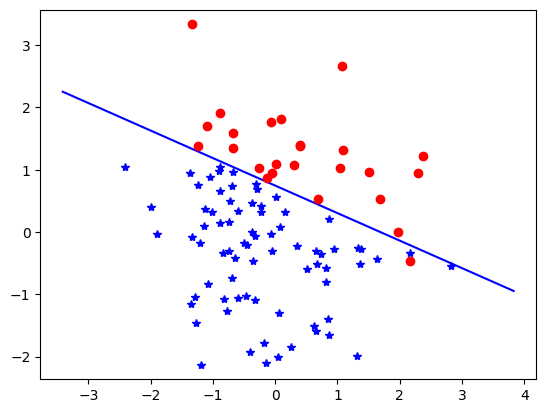

In [17]:
nF = 2
nP = 100
nOut = np.int(0.1*nP)
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP)
Noise = np.asarray([np.random.randn(1) if i < nOut else 0.0 for i in range(nP)], dtype=object)

LPop =  cTrue.T@Pop + bTrue + Noise  #corrupt some L-values with noise
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

[cEst, bEst, tAdjust] =  buildLinClass(G1,G2)

max(abs(tAdjust))      # should be 0 (or very close)
f1Min = min(Pop[0,:])  # minimum age
f1Max = max(Pop[0,:])  # maximum age
f2Min = min(Pop[1,:])  # minimum number of movies
f2Max = max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')

**Part (d)**
By minimizing the 1-norm, each slack variable is penalized. This means that the amount of adjustments needed for every outlier is taken into account and penalized. If instead, the infinty-norm was used, only one slack variable (the largest in terms of absolute value) would be penalized. The optimization problem then becomes focused on the worst case outlier and less on the overall trend. This would like result in a worse linear classifier especially in the case where there is potential for an extreme outlier.

***

# <font color = blue> 4. KKT Conditions </font>

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

**KKT Conditions:**

**Stationarity:**

\begin{align}
\begin{bmatrix}
-5 \\ -7
\end{bmatrix} + u_1^* \begin{bmatrix} -3 \\ 2
\end{bmatrix} + u_2^* \begin{bmatrix} -2 \\ 1
\end{bmatrix} + u_3^* \begin{bmatrix} -1 \\ 0
\end{bmatrix} + u_4^* \begin{bmatrix} 0 \\ -1
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{align}

**Complementary Slackness:**

\begin{align}
u_1^* g_1(z^*) = u_1^*(-3z_1^*+2z_2^*-30) &= 0 \\
u_2^* g_2(z^*) = u_2^*(-2z_1^*+z_2^*-12) &= 0 \\
u_3^* g_3(z^*) = u_3^*(-z_1^*) &= 0 \\
u_4^* g_4(z^*) = u_4^*(-z_2^*) &= 0 \\
\end{align}

**Dual feasibility:**
$u_1^*, u_2^*, u_3^*, u_4^* \geq 0$

**Primal feasibility:**
\begin{align}
g_1(z^*) = 3z_1^*+2z_2^*-30 \leq 0 \\
g_2(z^*) = -2z_1^*+z_2^*-12 \leq 0 \\
g_3(z^*) = -z_1^* \leq 0 \\
g_4(z^*) = -z_2^* \leq 0 \\
\end{align}

$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0
\end{align}

$\textbf{KKT conditions:}$

$\textbf{Stationarity:}$

\begin{align}
\begin{bmatrix}
3 \\ 1
\end{bmatrix} + u_1^* \begin{bmatrix} 1 \\ -1
\end{bmatrix} + u_2^* \begin{bmatrix} 3 \\ 2
\end{bmatrix} + u_3^* \begin{bmatrix} 2 \\ 3
\end{bmatrix} + u_4^* \begin{bmatrix} 2 \\ -3
\end{bmatrix} + u_5^* \begin{bmatrix} -1 \\ 0
\end{bmatrix} + u_6^* \begin{bmatrix} 0 \\ -1
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{align}

$\textbf{Complementary Slackness:}$
\begin{align}
u_1^* g_1(z^*) = u_1^*(z_1^*-z_2^*-1) &= 0 \\
u_2^* g_2(z^*) = u_2^*(3z_1^*+2z_2^*-12) &= 0 \\
u_3^* g_3(z^*) = u_3^*(2z_1^*+3z_2^*-3) &= 0 \\
u_4^* g_4(z^*) = u_4^*(2z_1^*-3z_2^*+9) &= 0 \\
u_5^* g_5(z^*) = u_5^*(-z_1^*) &= 0 \\
u_6^* g_6(z^*) = u_6^*(-z_2^*) &= 0 \\
\end{align}

$\textbf{Dual Feasibility:}$
$u_1^*, u_2^*, u_3^*, u_4^*, u_5^*, u_6^* \geq 0$

$\textbf{Primal Feasibility:}$
\begin{align}
g_1(z^*) = z_1^*-z_2^*-1 \leq 0 \\
g_2(z^*) = 3z_1^*+2z_2^*-12 \leq 0 \\
g_3(z^*) = 2z_1^*+3z_2^*-3 \leq 0 \\
g_4(z^*) = 2z_1^*-3z_2^*+9 \leq 0 \\
g_5(z^*) = -z_1^* \leq 0 \\
g_6(z^*) = -z_2^* \leq 0 \\
\end{align}

**Part (c)**

In [18]:
from pyomo.opt import SolverStatus, TerminationCondition
import numpy as np
import pyomo.environ as pyo

KKTsat = False
model = pyo.ConcreteModel()

model.z = pyo.Var([1,2], domain = pyo.NonNegativeReals)
model.obj = pyo.Objective(expr = 3*model.z[1] +  model.z[2])

model.constraints1 = pyo.Constraint(expr = model.z[1] - model.z[2] <= 1)
model.constraints2 = pyo.Constraint(expr = 3*model.z[1] + 2*model.z[2] <= 12)
model.constraints3 = pyo.Constraint(expr = 2*model.z[1] + 3*model.z[2] <= 3)
model.constraints4 = pyo.Constraint(expr = -2*model.z[1] + 3*model.z[2] >= 9)

model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

solver = pyo.SolverFactory('cbc')

results = solver.solve(model)

if results.solver.termination_condition != TerminationCondition.optimal:
    KKTsat = False
else:
    ZOpt = np.array([pyo.value(model.z[1]), pyo.value(model.z[2])])
    G = np.array([[1, -1],[3, 2],[2, 3],[2, -3],[-1, 0],[0, -1]])
    w = np.array([1, 12, 3, -9, 0, 0])

    y = []
    for c in model.component_objects(pyo.Constraint, active = True):
      print("Constraint", c)
      for index in c:
        y.append(model.dual[c[index]])
    y = np.asarray(y)

    flag_primal = np.all(G@zOpt <= w)
    flag_dual = np.all(y >= 0)
    flag_cs = np.all(u*(G@zOpt-w) == 0)
    flag_stat = np.all([3, 1] +y.T@G == 0)

    KKT_cond = np.array([flag_primal, flag_dual, flag_cs, flag_stat])
    if all(KKT_cond == 1):
      KKTsat == True

print(KKTsat)

  - termination condition: infeasible
  - message from solver: <undefined>


False


**Part (d)**

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \nonumber\\
\text{s.t. } & z_1 \leq -3 \nonumber\\
& z_2 \leq 4 \nonumber\\
& 0 \geq 4z_1+3z_2  \nonumber
\end{align}

**KKT Conditions:**

**Stationarity:**
\begin{align}
\begin{bmatrix}
2z_1^*\\ 2z_2^*
\end{bmatrix} + u_1^* \begin{bmatrix} 1 \\ 0
\end{bmatrix} + u_2^* \begin{bmatrix} 0 \\ 1
\end{bmatrix} + u_3^* \begin{bmatrix} 4 \\ 3
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{align}

**Complementary Slackness:**
\begin{align}
u_1^*g_1(z^*) = u_1^*(z_1^*+3) &= 0\\
u_2^*g_2(z^*) = u_2^*(z_2^*-4) &= 0\\
u_3^*g_3(z^*) = u_3^*(4z_1^*+3z_2^*) &= 0\\
\end{align}

**Dual Feasibility:**
$u_1^*, u_2^*, u_3^* \geq 0$

**Primal Feasibility:**
\begin{align}
g_1(z^*) = z_1^*+3 \leq 0\\
g_2(z^*) = z_2^*-4 \leq 0\\
g_3(z^*) = 4z_1^*+3z_2^* \leq 0\\
\end{align}

# <font color=blue> 5. Wrapper Question: </font>
